In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import word_tokenize, ngrams
from sklearn import ensemble
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import xgboost as xgb

eng_stopwords = set(stopwords.words('english'))
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
df_train = pd.read_csv("./data/train.csv")

In [ ]:
display(df_train.head())

In [6]:
df_test = pd.read_csv("./data/test.csv")

In [ ]:
df_test.head()

In [ ]:
# target value distribution
is_dup = df_train['is_duplicate'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=is_dup.index, y=is_dup.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.show()



In [11]:
# is_dup sum how many are 0 and 1
is_dup/is_dup.sum() # 0.5 is the ratio of 0 and 1


0    0.630802
1    0.369198
Name: is_duplicate, dtype: float64

In [12]:
# Now let us explore the question fields present in the train data. First let us check the number of words distribution in the questions.
all_ques_df= pd.DataFrame(pd.concat([df_train['question1'], df_train['question2']]))
all_ques_df.columns = ['question']
all_ques_df["num_of_words"] = all_ques_df['question'].apply(lambda x: len(str(x).split()))



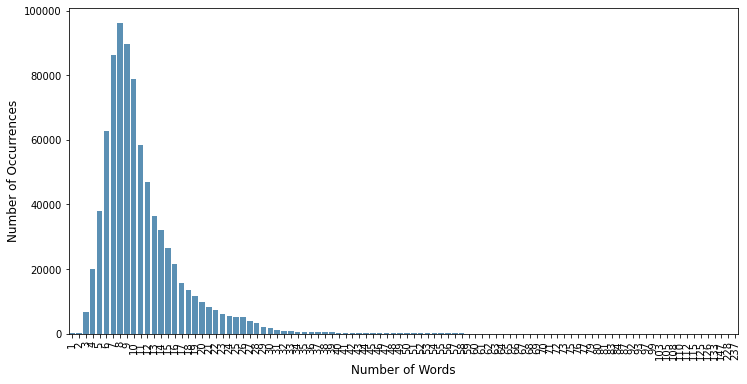

In [13]:
cnt_srs = all_ques_df['num_of_words'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8,color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Words', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [9]:
import xgboost as xgb

In [14]:
sub = pd.read_csv("./data/sample_submission.csv")

In [17]:
from sklearn.metrics import log_loss
p = df_train['is_duplicate'].mean()
print("Predicted score:",log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate'])+ p)) # 
sub = pd.DataFrame({"test_id" : df_test['test_id'], "is_duplicate": p})
sub.to_csv("submission1.csv", index=False)


Predicted score: 0.6585273839844354
